In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [21]:
# Load the cleaned dataset
df = pd.read_csv('./cleaned_weather_data.csv', index_col=0, parse_dates=True)

In [22]:
# Function to perform ADF Test
def check_adf(series, name):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f"ADF Test for {name}:")
    print(f"  ADF Statistic  : {result[0]:.4f}")
    print(f"  p-value        : {result[1]:.4f}")
    print(f"  Stationary     : {'Yes' if result[1] < 0.05 else 'No'}")
    print("-" * 40)
    return result[1] < 0.05  # True if stationary

In [23]:
df.head()

,location,temperature,rainfall,wind_speed,precipitation
date,,,,,
2010-01-01,Ampara,25.6,0.0,21.7,0.0
2010-01-02,Ampara,25.8,1.1,21.1,1.1
2010-01-03,Ampara,24.9,1.5,16.4,1.5
2010-01-04,Ampara,24.9,0.0,19.2,0.0
2010-01-05,Ampara,24.3,0.0,18.4,0.0


In [24]:
numeric_cols = ['rainfall', 'precipitation', 'temperature', 'wind_speed']

stationary_flags = {}
for col in numeric_cols:
    stationary_flags[col] = check_adf(df[col], col)


KeyboardInterrupt: 

In [ ]:
# Step 2: Apply differencing only to non-stationary columns
df_diff = df.copy(deep=True)
for col, is_stationary in stationary_flags.items():
    if not is_stationary:
        df_diff[col] = df_diff[col].diff()
    else:
        # Keep original data if already stationary
        df_diff[col] = df[col]

In [ ]:
# Step 3: Drop rows with NaN introduced by differencing
df_diff.dropna(inplace=True)


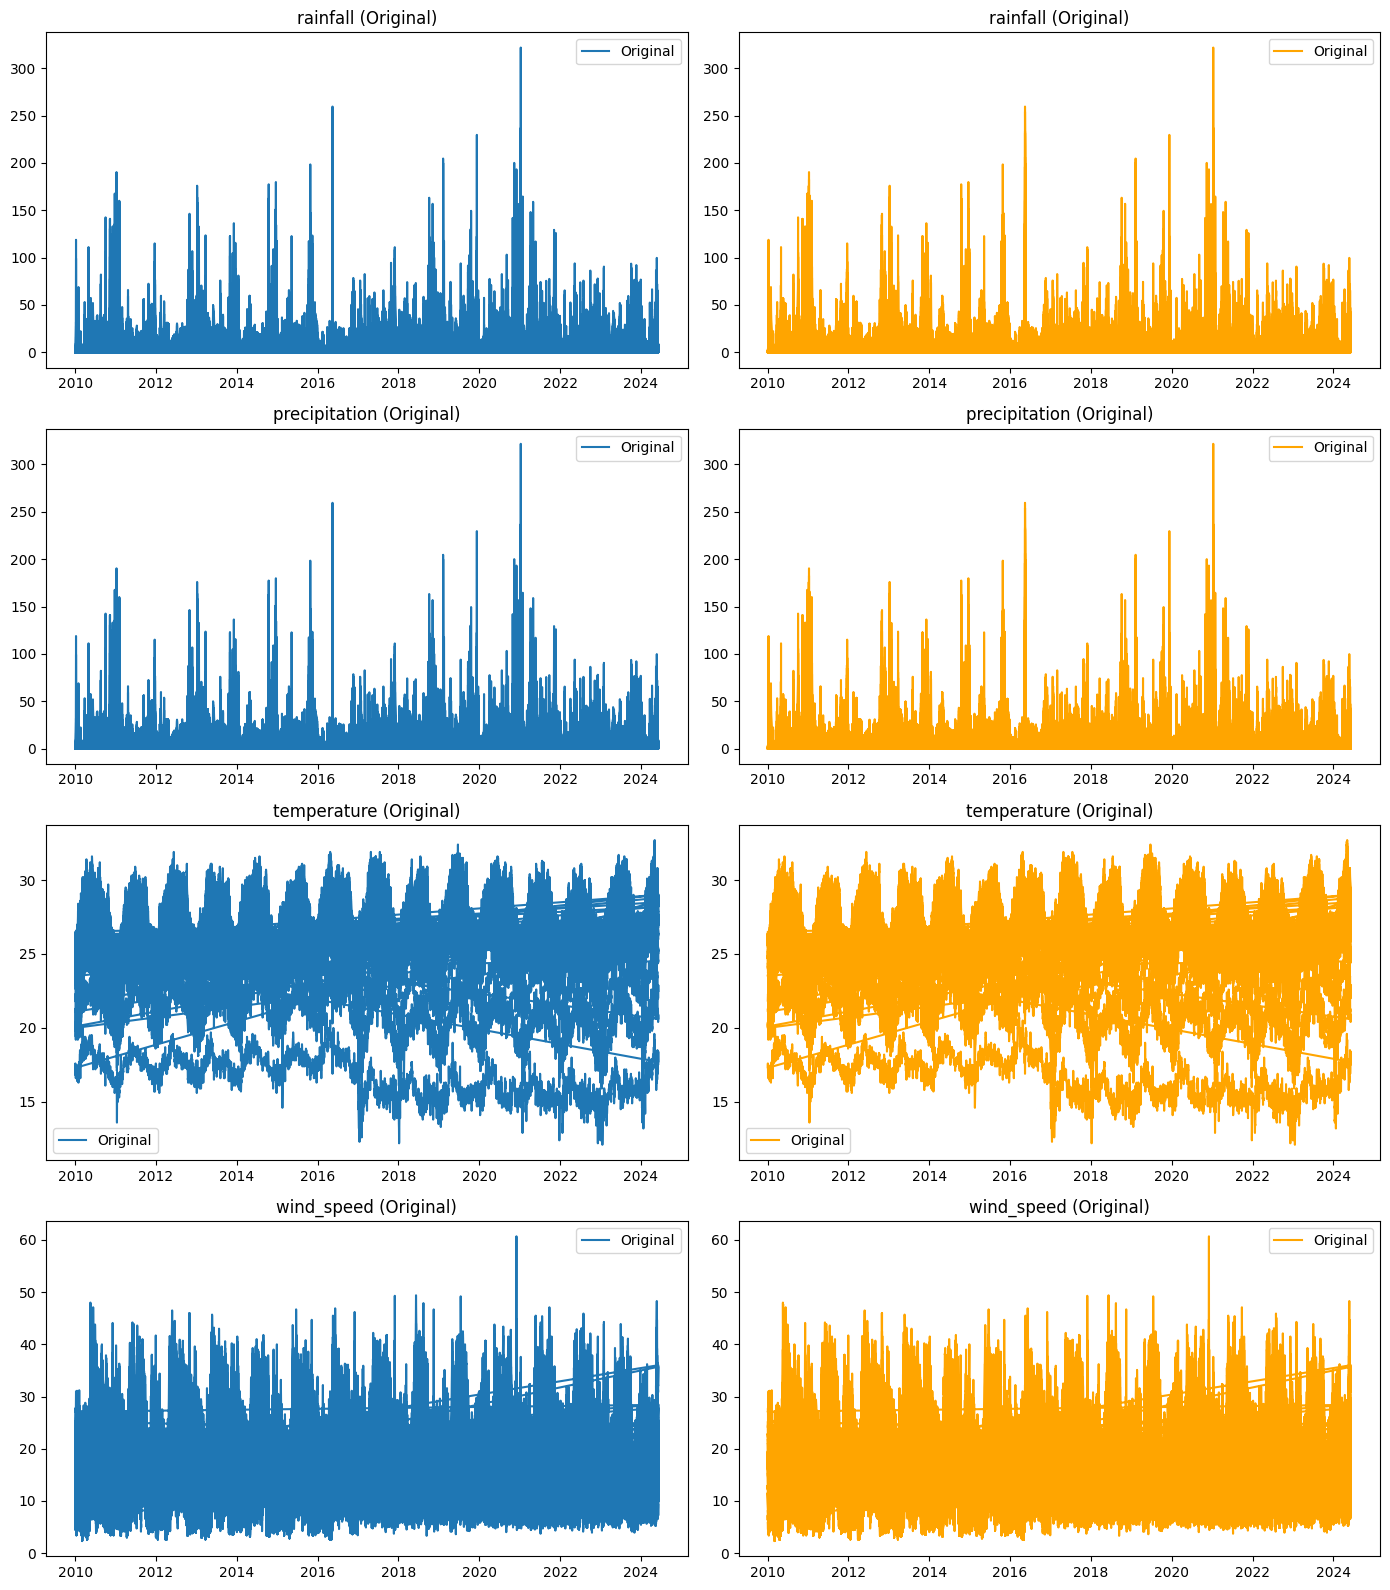

In [ ]:
# Step 4: Plot original vs differenced data (only numeric columns)
fig, axs = plt.subplots(nrows=len(numeric_cols), ncols=2, figsize=(14, 4 * len(numeric_cols)))
for i, col in enumerate(numeric_cols):
    axs[i, 0].plot(df[col], label='Original')
    axs[i, 0].set_title(f'{col} (Original)')
    axs[i, 0].legend()

    axs[i, 1].plot(df_diff[col], label='Differenced' if not stationary_flags[col] else 'Original', color='orange')
    axs[i, 1].set_title(f'{col} (Differenced)' if not stationary_flags[col] else f'{col} (Original)')
    axs[i, 1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Step 5: Save the stationarized dataset
df_diff.to_csv('weather_data_stationary.csv')
print("✅ Stationarized dataset saved to 'weather_data_stationary.csv'")

✅ Stationarized dataset saved to 'weather_data_stationary.csv'


In [ ]:
# Optional: Summary of what was differenced
print("\nSummary:")
print("Stationary columns:", [k for k, v in stationary_flags.items() if v])
print("Differenced columns:", [k for k, v in stationary_flags.items() if not v])


Summary:
Stationary columns: ['rainfall', 'precipitation', 'temperature', 'wind_speed']
Differenced columns: []
